#### **You are required to provide a detailed report for the below data record mentioning the answers of the questions that follows:**

- **Cleaning the data:** 
    - This is one of the most important step to perform before moving forward with the analysis. 
    - Use your knowledge learned till now to do this. (Dropping columns, removing null values, etc.) 
     
             Your task: Clean the data.

- **Movies with highest profit:** 
    - Create a new column called profit which contains the difference of the two columns: gross and budget. 
    - Sort the column using the profit column as reference. 
    - Plot profit (y-axis) vs budget (x- axis) and observe the outliers using the appropriate chart type.
        
            Your task: Find the movies with the highest profit?

- **Top 250:** 
    - Create a new column IMDb_Top_250 and store the top 250 movies with the highest IMDb Rating (corresponding to the column: imdb_score). 
    - Also make sure that for all of these movies, the num_voted_users is greater than 25,000. Also add a Rank column containing the values 1 to 250 indicating the ranks of the corresponding films.
    - Extract all the movies in the IMDb_Top_250 column which are not in the English language and store them in a new column named Top_Foreign_Lang_Film. You can use your own imagination also!
        
            Your task: Find IMDB Top 250
        
- **Best Directors:** 
    - Group the column using the director_name column.
    - Find out the top 10 directors for whom the mean of imdb_score is the highest and store them in a new column top10director. 
    - In case of a tie in IMDb score between two directors, sort them alphabetically.
        
            Your task: Find the best directors

- **Popular Genres:** 
    - Perform this step using the knowledge gained while performing previous steps.
        
            Your task: Find popular genres.
        
- **Charts:** 
    - Create three new columns namely, Meryl_Streep, Leo_Caprio, and Brad_Pitt which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. 
    - Use only the actor_1_name column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.

    - Append the rows of all these columns and store them in a new column named Combined.

    - Group the combined column using the actor_1_name column.

    - Find the mean of the num_critic_for_reviews and num_users_for_review and identify the actors which have the highest mean.

    - Observe the change in number of voted users over decades using a bar chart. 
    - Create a column called decade which represents the decade to which every movie belongs to. For example, the title_year year 1923, 1925 should be stored as 1920s. 
    - Sort the column based on the column decade, group it by decade and find the sum of users voted in each decade. Store this in a new data frame called df_by_decade.
    
            Your task: Find the critic-favorite and audience-favorite actors

#### **1. Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### **2. Importing the IMDB dataset**

In [2]:
movies_df = pd.read_csv("IMDB_Movies.csv")

In [3]:
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies_df.shape

(5043, 28)

#### **3. Cleaning the IMDB dataset**

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [6]:
movies_df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
# Total no. of Duplicates: 
movies_df.duplicated().sum()

45

In [8]:
# Dropping the duplicate values:
movies_df.drop_duplicates(inplace=True)

In [9]:
movies_df.dropna(inplace=True)

In [10]:
# Dropping unnecessary columns:

movies_df = movies_df.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name',
 'duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)

#### **4. Movies with highest profit**

In [11]:
movies_df['profit'] = (movies_df['gross'] - movies_df['budget'])

In [12]:
# Movies with highest profits
movies_df[['movie_title', 'director_name', 
           'imdb_score', 'gross', 'budget', 
           'profit']].sort_values(by='profit', ascending=False).head(10)

,movie_title,director_name,imdb_score,gross,budget,profit
0,Avatar,James Cameron,7.9,760505847.0,237000000.0,523505847.0
29,Jurassic World,Colin Trevorrow,7.0,652177271.0,150000000.0,502177271.0
26,Titanic,James Cameron,7.7,658672302.0,200000000.0,458672302.0
3024,Star Wars: Episode IV - A New Hope,George Lucas,8.7,460935665.0,11000000.0,449935665.0
3080,E.T. the Extra-Terrestrial,Steven Spielberg,7.9,434949459.0,10500000.0,424449459.0
17,The Avengers,Joss Whedon,8.1,623279547.0,220000000.0,403279547.0
509,The Lion King,Roger Allers,8.5,422783777.0,45000000.0,377783777.0
240,Star Wars: Episode I - The Phantom Menace,George Lucas,6.5,474544677.0,115000000.0,359544677.0
66,The Dark Knight,Christopher Nolan,9.0,533316061.0,185000000.0,348316061.0
439,The Hunger Games,Gary Ross,7.3,407999255.0,78000000.0,329999255.0


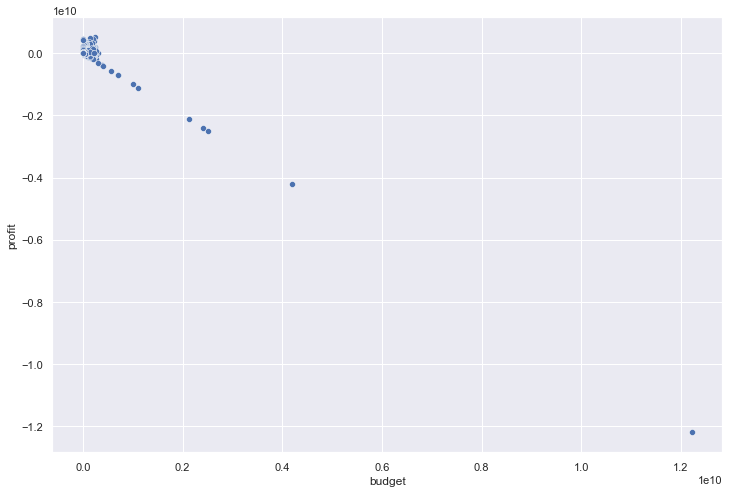

In [46]:
plt.figure(figsize =(12, 8))
sns.scatterplot(data=movies_df, x='budget', y='profit')
sns.set_theme(style='white')
sns.set_style("darkgrid")

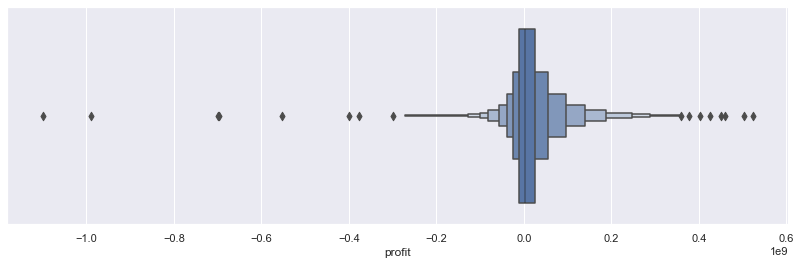

In [14]:
# Boxenplot for 'profit' column 
plt.figure(figsize =(14, 4))
# Movies with profit greater than -2*10^9 Dollars
sns.boxenplot(movies_df['profit'][movies_df['profit'] > -2e9])
plt.show()

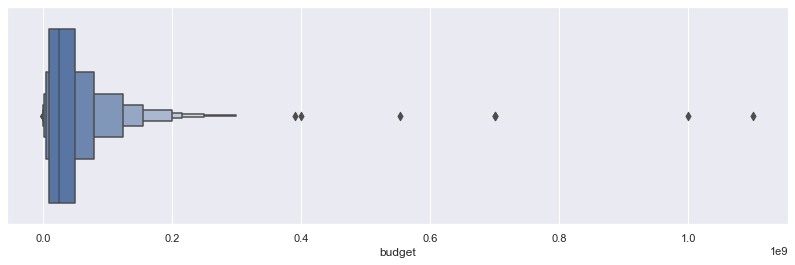

In [15]:
# Boxenplot for 'budget' column
plt.figure(figsize =(14, 4))
# Movies with budget less than 2*10^9 Dollars
sns.boxenplot(movies_df['budget'][movies_df['budget'] < 2e9])
plt.show()

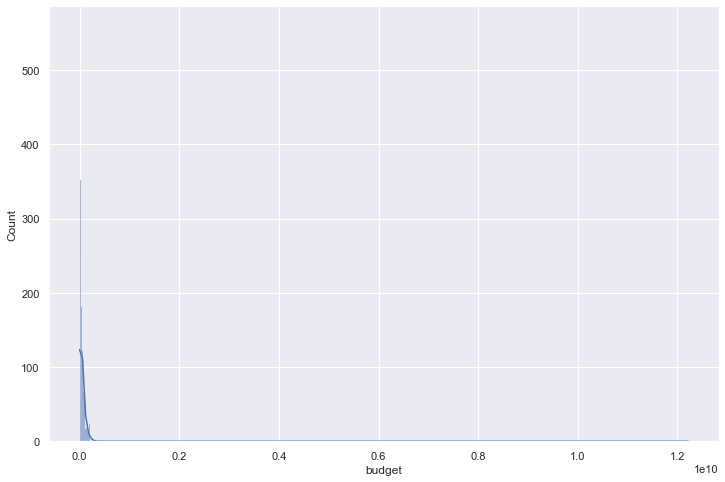

In [16]:
plt.subplots(figsize=(12,8))
sns.histplot(data=movies_df, x='budget', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

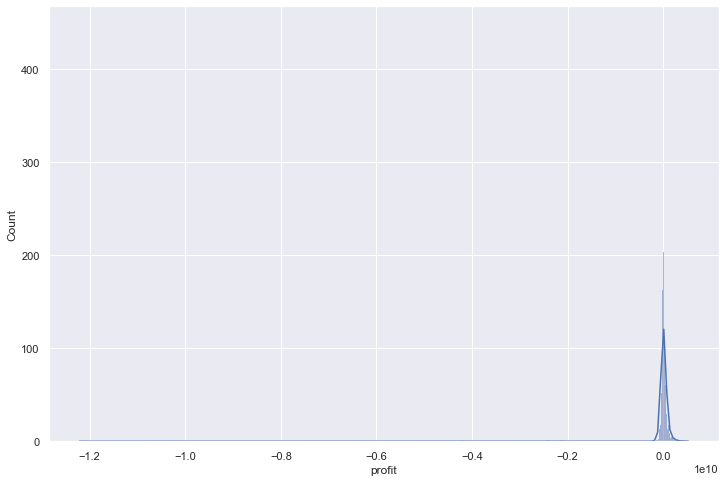

In [17]:
plt.subplots(figsize=(12, 8))
sns.histplot(data=movies_df, x='profit', kde=True)
sns.set_theme(style='white')
sns.set_style("darkgrid")

#### **5. Top 250 Movies based on IMDB ratings**

In [18]:
top250 = movies_df[['movie_title', 'director_name', 'title_year', 'num_voted_users', 'language',
           'imdb_score']][movies_df['num_voted_users'] > 25000].sort_values(
    by='imdb_score', ascending=False).head(250)

In [19]:
top250.head(10)

,movie_title,director_name,title_year,num_voted_users,language,imdb_score
1937,The Shawshank Redemption,Frank Darabont,1994.0,1689764,English,9.3
3466,The Godfather,Francis Ford Coppola,1972.0,1155770,English,9.2
66,The Dark Knight,Christopher Nolan,2008.0,1676169,English,9.0
2837,The Godfather: Part II,Francis Ford Coppola,1974.0,790926,English,9.0
3355,Pulp Fiction,Quentin Tarantino,1994.0,1324680,English,8.9
4498,"The Good, the Bad and the Ugly",Sergio Leone,1966.0,503509,Italian,8.9
339,The Lord of the Rings: The Return of the King,Peter Jackson,2003.0,1215718,English,8.9
1874,Schindler's List,Steven Spielberg,1993.0,865020,English,8.9
2051,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,1980.0,837759,English,8.8
270,The Lord of the Rings: The Fellowship of the R...,Peter Jackson,2001.0,1238746,English,8.8


In [20]:
top250['IMDb_Top_250'] =  range(1, len(top250) + 1)

In [21]:
top250.head(15)

,movie_title,director_name,title_year,num_voted_users,language,imdb_score,IMDb_Top_250
1937,The Shawshank Redemption,Frank Darabont,1994.0,1689764,English,9.3,1
3466,The Godfather,Francis Ford Coppola,1972.0,1155770,English,9.2,2
66,The Dark Knight,Christopher Nolan,2008.0,1676169,English,9.0,3
2837,The Godfather: Part II,Francis Ford Coppola,1974.0,790926,English,9.0,4
3355,Pulp Fiction,Quentin Tarantino,1994.0,1324680,English,8.9,5
4498,"The Good, the Bad and the Ugly",Sergio Leone,1966.0,503509,Italian,8.9,6
339,The Lord of the Rings: The Return of the King,Peter Jackson,2003.0,1215718,English,8.9,7
1874,Schindler's List,Steven Spielberg,1993.0,865020,English,8.9,8
2051,Star Wars: Episode V - The Empire Strikes Back,Irvin Kershner,1980.0,837759,English,8.8,9
270,The Lord of the Rings: The Fellowship of the R...,Peter Jackson,2001.0,1238746,English,8.8,10


In [22]:
Top_Foreign_Lang_Film = top250[(top250['language'] != 'English')]

In [23]:
Top_Foreign_Lang_Film.head(10)

,movie_title,director_name,title_year,num_voted_users,language,imdb_score,IMDb_Top_250
4498,"The Good, the Bad and the Ugly",Sergio Leone,1966.0,503509,Italian,8.9,6
4029,City of God,Fernando Meirelles,2002.0,533200,Portuguese,8.7,15
4747,Seven Samurai,Akira Kurosawa,1954.0,229012,Japanese,8.7,20
2373,Spirited Away,Hayao Miyazaki,2001.0,417971,Japanese,8.6,24
4921,Children of Heaven,Majid Majidi,1997.0,27882,Persian,8.5,36
4259,The Lives of Others,Florian Henckel von Donnersmarck,2006.0,259379,German,8.5,44
2970,Das Boot,Wolfgang Petersen,1981.0,168203,German,8.4,50
1298,Amélie,Jean-Pierre Jeunet,2001.0,534262,French,8.4,53
2323,Princess Mononoke,Hayao Miyazaki,1997.0,221552,Japanese,8.4,54
4659,A Separation,Asghar Farhadi,2011.0,151812,Persian,8.4,57


In [24]:
director = movies_df[['director_name', 'imdb_score']].groupby(['director_name']).mean()

In [25]:
director = director.sort_values(by=['imdb_score', 'director_name'], ascending=False)

In [26]:
top10director = director.head(10)

In [27]:
top10director.sort_values(by=['imdb_score', 'director_name'], ascending=False)

,imdb_score
director_name,
Akira Kurosawa,8.700000
Tony Kaye,8.600000
Charles Chaplin,8.600000
Ron Fricke,8.500000
Majid Majidi,8.500000
Damien Chazelle,8.500000
Alfred Hitchcock,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000


In [28]:
movies_df['genres']

0           Action|Adventure|Fantasy|Sci-Fi
1                  Action|Adventure|Fantasy
2                 Action|Adventure|Thriller
3                           Action|Thriller
5                   Action|Adventure|Sci-Fi
                       ...                 
5026                    Drama|Music|Romance
5027                                  Drama
5033                  Drama|Sci-Fi|Thriller
5035    Action|Crime|Drama|Romance|Thriller
5042                            Documentary
Name: genres, Length: 3723, dtype: object

#### **6. Popular Genres**

In [29]:
# Let's find the no. of occurences of all the genres:
# Create a new Pandas series from the 'genres' column:
genre_list = movies_df['genres'].str.split('|')
# Create an empty dictionary to store the counts of each genre
genres={}
for genre in genre_list:
    for data in genre:
        genres[data] = genres.get(data, 0) + 1
        
genres_df = pd.DataFrame(genres.values(),index = genres.keys(),columns={'No. of Occurences'})
genres_df.sort_values(by='No. of Occurences', ascending=False, inplace=True)
genres_df.head(25)

,No. of Occurences
Drama,1876
Comedy,1455
Thriller,1105
Action,951
Romance,851
Adventure,773
Crime,704
Fantasy,504
Sci-Fi,492
Family,440


In [30]:
# Let's find the most popular genres based on imdb_score >= 7.5:
# Create a new Pandas series from the 'genres' column:
genre_list = movies_df['genres'][movies_df['imdb_score'] >= 7.5].str.split('|')
# Create an empty dictionary to store the counts of each genre
genres={}
for genre in genre_list:
    for data in genre:
        genres[data] = genres.get(data, 0) + 1
        
genres_df = pd.DataFrame(genres.values(),index = genres.keys(),columns={'No. of Occurences'})
genres_df.sort_values(by='No. of Occurences', ascending=False, inplace=True)
genres_df.head(25)

,No. of Occurences
Drama,431
Thriller,145
Adventure,139
Comedy,129
Crime,119
Romance,112
Action,111
Biography,83
Sci-Fi,77
Fantasy,76


In [31]:
# Let's find the most popular genres based on imdb_score >= 8:
# Create a new Pandas series from the 'genres' column:
genre_list = movies_df['genres'][movies_df['imdb_score'] >= 8].str.split('|')
# Create an empty dictionary to store the counts of each genre
genres={}
for genre in genre_list:
    for data in genre:
        genres[data] = genres.get(data, 0) + 1
        
genres_df = pd.DataFrame(genres.values(),index = genres.keys(),columns={'No. of Occurences'})
genres_df.sort_values(by='No. of Occurences', ascending=False, inplace=True)
genres_df.head(25)

,No. of Occurences
Drama,141
Adventure,60
Thriller,47
Action,44
Crime,41
Sci-Fi,35
Comedy,30
Fantasy,28
Biography,28
Romance,24


#### **Find the critic-favorite and audience-favorite actors**

In [32]:
meryl_streep = movies_df[(movies_df['actor_1_name']=='Meryl Streep')]

In [33]:
leo_dcaprio = movies_df[(movies_df['actor_1_name']=='Leonardo DiCaprio')]

In [34]:
brad_pitt = movies_df[(movies_df['actor_1_name']=='Brad Pitt')]

In [35]:
# Creating the combined dataframe:
brad_pitt = brad_pitt.append(meryl_streep,ignore_index=True)

In [36]:
combined = brad_pitt.append(leo_dcaprio,ignore_index=True)
combined.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,David Fincher,362.0,127490802.0,Drama|Fantasy|Romance,Brad Pitt,The Curious Case of Benjamin Button,459346,822,English,150000000.0,2008.0,7.8,23000,-22509198.0
1,Wolfgang Petersen,220.0,133228348.0,Adventure,Brad Pitt,Troy,381672,1694,English,175000000.0,2004.0,7.2,0,-41771652.0
2,Steven Soderbergh,198.0,125531634.0,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627,English,110000000.0,2004.0,6.4,0,15531634.0
3,Doug Liman,233.0,186336103.0,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798,English,120000000.0,2005.0,6.5,0,66336103.0
4,Tony Scott,142.0,26871.0,Action|Crime|Thriller,Brad Pitt,Spy Game,121259,361,English,92000000.0,2001.0,7.0,0,-91973129.0
5,Steven Soderbergh,186.0,183405771.0,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845,English,85000000.0,2001.0,7.8,0,98405771.0
6,David Ayer,406.0,85707116.0,Action|Drama|War,Brad Pitt,Fury,303185,701,English,68000000.0,2014.0,7.6,82000,17707116.0
7,Jean-Jacques Annaud,76.0,37901509.0,Adventure|Biography|Drama|History|War,Brad Pitt,Seven Years in Tibet,96385,119,English,70000000.0,1997.0,7.0,0,-32098491.0
8,David Fincher,315.0,37023395.0,Drama,Brad Pitt,Fight Club,1347461,2968,English,63000000.0,1999.0,8.8,48000,-25976605.0
9,Patrick Gilmore,98.0,26288320.0,Adventure|Animation|Comedy|Drama|Family|Fantas...,Brad Pitt,Sinbad: Legend of the Seven Seas,36144,91,English,60000000.0,2003.0,6.7,880,-33711680.0


In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           49 non-null     object 
 1   num_critic_for_reviews  49 non-null     float64
 2   gross                   49 non-null     float64
 3   genres                  49 non-null     object 
 4   actor_1_name            49 non-null     object 
 5   movie_title             49 non-null     object 
 6   num_voted_users         49 non-null     int64  
 7   num_user_for_reviews    49 non-null     object 
 8   language                49 non-null     object 
 9   budget                  49 non-null     float64
 10  title_year              49 non-null     float64
 11  imdb_score              49 non-null     float64
 12  movie_facebook_likes    49 non-null     int64  
 13  profit                  49 non-null     float64
dtypes: float64(6), int64(2), object(6)
memory us

In [41]:
combined['num_user_for_reviews'] = combined['num_user_for_reviews'].astype('float64')

In [42]:
comb = combined.groupby(by='actor_1_name').mean()

In [43]:
comb[['num_user_for_reviews', 'num_critic_for_reviews']]

,num_user_for_reviews,num_critic_for_reviews
actor_1_name,,
Brad Pitt,742.352941,245.000000
Leonardo DiCaprio,914.476190,330.190476
Meryl Streep,297.181818,181.454545


<AxesSubplot:xlabel='actor_1_name'>

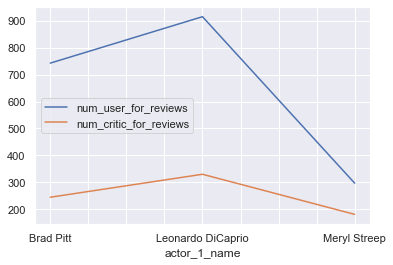

In [48]:
comb[['num_user_for_reviews', 'num_critic_for_reviews']].plot(legend=True)

In [49]:
# Making decade bins for the movie release years:
movies_df['decade'] = movies_df['title_year'].apply(lambda x: (x//10) *10).astype(np.int64) 
movies_df['decade'] = movies_df['decade'].astype(str) + 's'
movies_df.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,decade
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000,523505847.0,2000s
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0,9404152.0,2000s
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000,-44925825.0,2010s
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000,198130642.0,2010s
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000,-190641321.0,2010s
6,Sam Raimi,392.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,1902,English,258000000.0,2007.0,6.2,0,78530303.0,2000s
7,Nathan Greno,324.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,387,English,260000000.0,2010.0,7.8,29000,-59192738.0,2010s
8,Joss Whedon,635.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,1117,English,250000000.0,2015.0,7.5,118000,208991599.0,2010s
9,David Yates,375.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,973,English,250000000.0,2009.0,7.5,10000,51956980.0,2000s
10,Zack Snyder,673.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,3018,English,250000000.0,2016.0,6.9,197000,80249062.0,2010s


In [55]:
df_by_decade=pd.DataFrame(movies_df.groupby(by='decade')['num_voted_users'].sum().head(10))

In [56]:
df_by_decade

,num_voted_users
decade,
1920s,116387
1930s,804839
1940s,159517
1950s,678336
1960s,2982551
1970s,8523299
1980s,19987476
1990s,69581866
2000s,170711435


<AxesSubplot:xlabel='decade', ylabel='num_voted_users'>

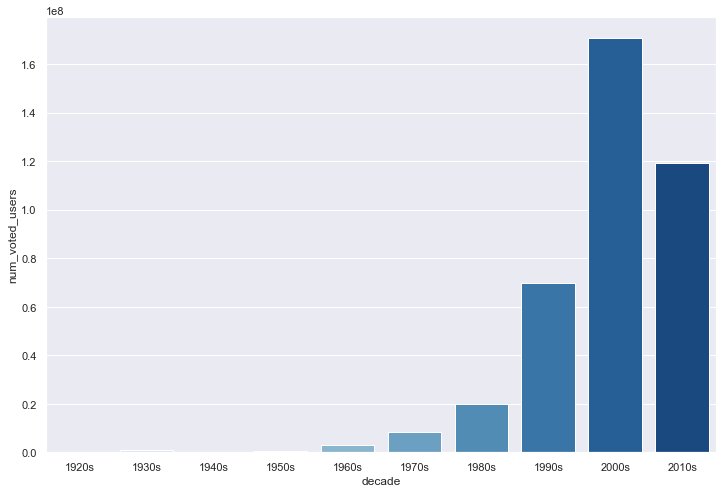

In [73]:
plt.figure(figsize =(12, 8))
sns.barplot(data=df_by_decade, y='num_voted_users', x=df_by_decade.index, palette='Blues')